# EDA Steps

## 1. Importation des bibliothèques et chargement des données

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

#A

In [133]:
df = pd.read_csv("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\bicycle_accident.csv", sep=",")

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\2606352.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\bicycle_accident.csv", sep=",")


## 2. Observation des données

Afficher le nombre de lignes et de colonnes

In [3]:
df.shape

(74758, 40)

Afficher le nom des variables (colonnes)

In [4]:
df.columns

Index(['Num_Acc', 'date', 'an', 'mois', 'jour', 'hrmn', 'dep', 'com', 'lat',
       'long', 'agg', 'int', 'col', 'lum', 'atm', 'catr', 'circ', 'nbv',
       'prof', 'plan', 'lartpc', 'larrout', 'surf', 'infra', 'situ', 'grav',
       'sexe', 'age', 'trajet', 'secuexist', 'equipement', 'obs', 'obsm',
       'choc', 'manv', 'vehiculeid', 'typevehicules', 'manoeuvehicules',
       'numVehicules', '_infos_commune.code_epci'],
      dtype='object')

Afficher les 5 premières lignes

In [5]:
df.head(5).round(2)

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
0,200500000030,2005-01-13,2005,janvier,jeudi,19:45,62,62331,50.30,2.84,...,0,0.0,2.0,8.0,11.0,200500000030B02,18,17,1.0,200033579.0
1,200500000034,2005-01-19,2005,janvier,mercredi,10:45,62,62022,0.00,0.00,...,0,0.0,2.0,1.0,1.0,200500000034B02,10,15,1.0,200018083.0
2,200500000078,2005-01-26,2005,janvier,mercredi,13:15,02,02173,0.00,0.00,...,2,0.0,2.0,1.0,1.0,200500000078B02,7,15,1.0,200071785.0
3,200500000093,2005-01-03,2005,janvier,lundi,13:30,02,02810,49.26,3.09,...,0,0.0,2.0,3.0,21.0,200500000093B02,7,21,1.0,200071991.0
4,200500000170,2005-01-29,2005,janvier,samedi,18:30,76,76196,0.00,0.00,...,9,0.0,2.0,4.0,2.0,200500000170A01,10,2,1.0,200084952.0


Afficher les 5 dernières lignes

In [6]:
df.tail(5).round(2)

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules,_infos_commune.code_epci
74753,202100056317,2021-01-02,2021,janvier,samedi,18:30,44,44168,47.38,-2.20,...,NaN,0.0,0.0,8.0,1.0,202100056317B01,7,14,1.0,244400644.0
74754,202100056362,2021-01-04,2021,janvier,lundi,08:20,64,64138,43.23,-0.28,...,2,0.0,2.0,0.0,1.0,202100056362B01,7,15,1.0,246401756.0
74755,202100056404,2021-01-01,2021,janvier,vendredi,16:55,54,54395,48.68,6.18,...,2,0.0,2.0,1.0,25.0,202100056404A01,7,1,1.0,245400676.0
74756,202100056424,2021-01-02,2021,janvier,samedi,15:40,75,75110,48.88,2.37,...,NaN,0.0,2.0,1.0,1.0,202100056424A01,7,9,1.0,200054781.0
74757,202100056508,2021-01-01,2021,janvier,vendredi,12:20,64,64400,43.15,-0.20,...,2/6,0.0,0.0,8.0,1.0,202100056508A01,NaN,NaN,NaN,246401756.0


Afficher quelques informations générales sur les données

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74758 entries, 0 to 74757
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Num_Acc                   74758 non-null  int64  
 1   date                      74758 non-null  object 
 2   an                        74758 non-null  int64  
 3   mois                      74758 non-null  object 
 4   jour                      74758 non-null  object 
 5   hrmn                      74758 non-null  object 
 6   dep                       74758 non-null  object 
 7   com                       74758 non-null  object 
 8   lat                       74758 non-null  float64
 9   long                      74490 non-null  float64
 10  agg                       74758 non-null  int64  
 11  int                       74758 non-null  int64  
 12  col                       74754 non-null  float64
 13  lum                       74758 non-null  int64  
 14  atm   

In [8]:
df.dtypes

Num_Acc                       int64
date                         object
an                            int64
mois                         object
jour                         object
hrmn                         object
dep                          object
com                          object
lat                         float64
long                        float64
agg                           int64
int                           int64
col                         float64
lum                           int64
atm                         float64
catr                          int64
circ                        float64
nbv                         float64
prof                        float64
plan                        float64
lartpc                      float64
larrout                     float64
surf                        float64
infra                       float64
situ                        float64
grav                          int64
sexe                          int64
age                         

Afficher un résumé statistique des colonnes numériques

<span style="color: green">À faire : analyser chaque variable pour ensuite ne garder que les colonnes pertinentes ici</span>

In [9]:
df.describe().round(2)

,Num_Acc,an,lat,long,agg,int,col,lum,atm,catr,...,sexe,age,trajet,secuexist,obs,obsm,choc,manv,numVehicules,_infos_commune.code_epci
count,7.475800e+04,74758.00,74758.00,74490.00,74758.00,74758.00,74754.00,74758.00,74755.00,74758.00,...,74758.00,74732.00,74755.00,74758.00,74732.00,74717.00,74746.00,74742.00,64465.00,7.264800e+04
mean,2.012155e+11,2012.16,19.39,0.88,1.82,2.11,3.50,1.54,1.45,3.80,...,1.24,39.72,3.50,2.14,0.40,1.64,2.82,5.37,1.02,2.164169e+08
std,4.702944e+08,4.70,23.30,6.72,0.38,1.80,1.78,1.27,1.51,1.04,...,0.43,45.54,2.54,0.86,2.11,1.16,2.79,7.03,0.18,2.170030e+07
min,2.005000e+11,2005.00,-23.87,-151.76,1.00,0.00,-1.00,1.00,1.00,1.00,...,-1.00,1.00,-1.00,0.00,-1.00,-1.00,-1.00,-1.00,1.00,2.000002e+08
25%,2.008000e+11,2008.00,0.00,0.00,2.00,1.00,3.00,1.00,1.00,3.00,...,1.00,21.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,2.000548e+08
50%,2.012000e+11,2012.00,0.00,0.00,2.00,1.00,3.00,1.00,1.00,4.00,...,1.00,37.00,5.00,2.00,0.00,2.00,1.00,1.00,1.00,2.000680e+08
75%,2.016000e+11,2016.00,47.20,2.23,2.00,3.00,5.00,1.00,1.00,4.00,...,1.00,55.00,5.00,3.00,0.00,2.00,4.00,11.00,1.00,2.434000e+08
max,2.021001e+11,2021.00,51.07,167.13,2.00,9.00,7.00,5.00,9.00,9.00,...,2.00,2021.00,9.00,3.00,17.00,9.00,9.00,26.00,5.00,2.497401e+08


Afficher un aperçu des valeurs manquantes

In [10]:
df.isnull().sum()

Num_Acc                         0
date                            0
an                              0
mois                            0
jour                            0
hrmn                            0
dep                             0
com                             0
lat                             0
long                          268
agg                             0
int                             0
col                             4
lum                             0
atm                             3
catr                            0
circ                          143
nbv                           197
prof                          177
plan                          200
lartpc                      10972
larrout                      5092
surf                          174
infra                         536
situ                          494
grav                            0
sexe                            0
age                            26
trajet                          3
secuexist     

# 3. Analyse univariée

Afficher les histogrammes des variables

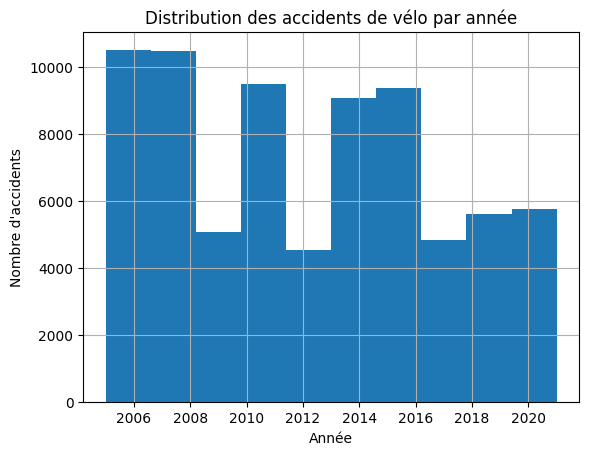

In [11]:
df['an'].hist()
plt.title("Distribution des accidents de vélo par année")
plt.xlabel("Année")
plt.ylabel("Nombre d'accidents")
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\1391108848.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sexe'] = df_filtered['sexe'].replace({1: 'Homme', 2: 'Femme'})


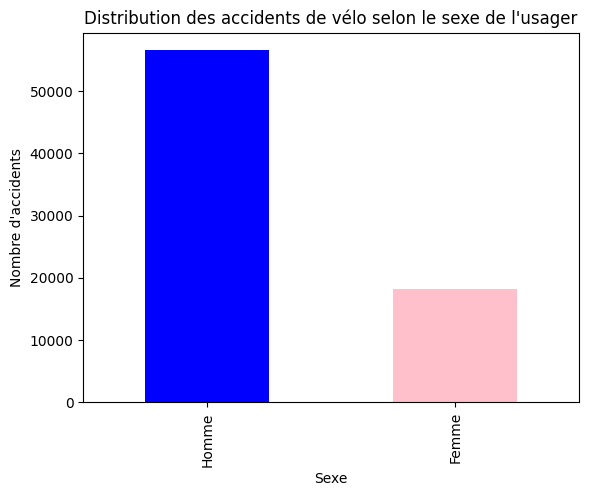

In [12]:
# Exclure le sexe égal à -1
df_filtered=df[df['sexe'].isin([1,2])]

# Remplacement des valeurs par une chaîne de caractère (pour le côté esthétique)
df_filtered['sexe'] = df_filtered['sexe'].replace({1: 'Homme', 2: 'Femme'})

df_filtered['sexe'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title("Distribution des accidents de vélo selon le sexe de l'usager")
plt.xlabel("Sexe")
plt.ylabel("Nombre d'accidents")
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\1894660078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['agg'] = df_filtered['agg'].replace({1: 'Hors agglomération', 2: 'En agglomération'})


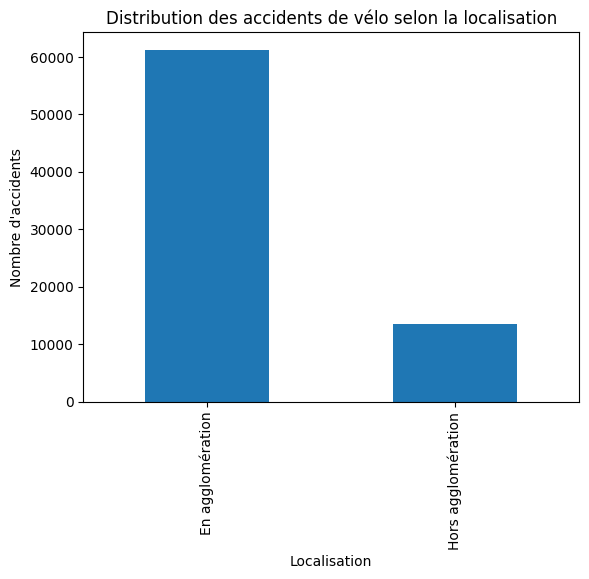

In [13]:
# Remplacement des valeurs une chaîne de caractère (pour le côté esthétique)
df_filtered['agg'] = df_filtered['agg'].replace({1: 'Hors agglomération', 2: 'En agglomération'})
df_filtered['agg'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon la localisation")
plt.xlabel("Localisation")
plt.ylabel("Nombre d'accidents")
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\3355965324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lum'] = df_filtered['lum'].replace({1: 'Plein jour', 2: 'Crépuscule ou aube', 3: 'Nuit sans éclairage public', 4: 'Nuit avec éclairage public non allumé', 5: 'Nuit avec éclairage public allumé'})


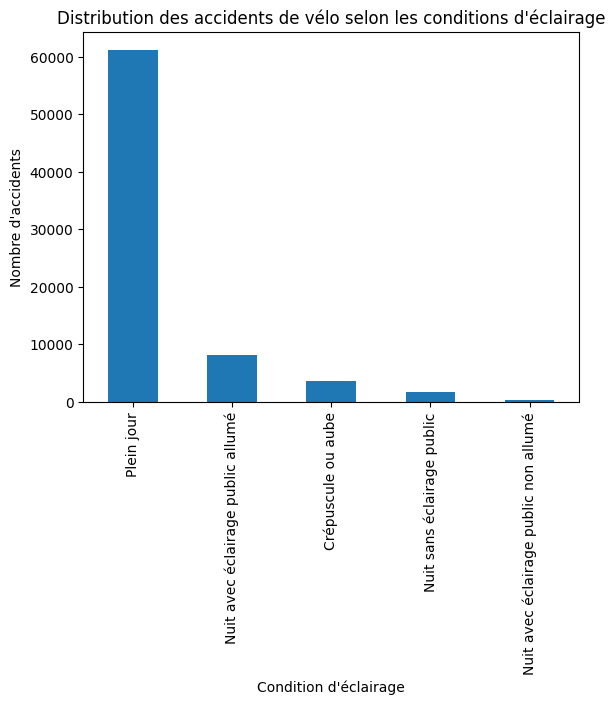

In [14]:
# Remplacement des valeurs une chaîne de caractère (pour le côté esthétique)
df_filtered['lum'] = df_filtered['lum'].replace({1: 'Plein jour', 2: 'Crépuscule ou aube', 3: 'Nuit sans éclairage public', 4: 'Nuit avec éclairage public non allumé', 5: 'Nuit avec éclairage public allumé'})

df_filtered['lum'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon les conditions d'éclairage")
plt.xlabel("Condition d'éclairage")
plt.ylabel("Nombre d'accidents")
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\2932672635.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['catr'] = df_filtered['catr'].replace({1: 'Autoroute', 2: 'Route nationale', 3: 'Route départementale', 4: 'Voie communale', 5: 'Hors réseau public', 6:'Parc de stationnement ouvert à la circulation publique', 7:'Routes de métropole urbaine', 9:'Autre'})


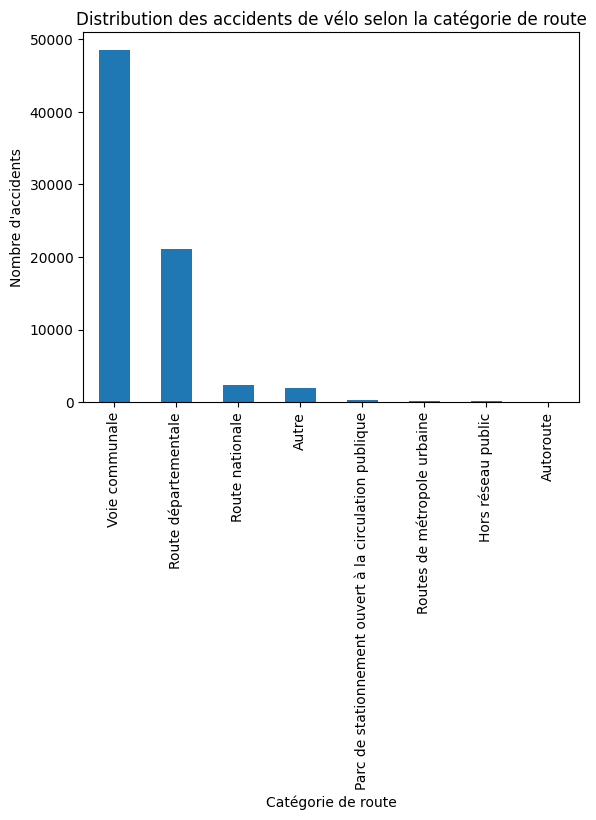

In [15]:
# Remplacement des valeurs une chaîne de caractère (pour le côté esthétique)
df_filtered['catr'] = df_filtered['catr'].replace({1: 'Autoroute', 2: 'Route nationale', 3: 'Route départementale', 4: 'Voie communale', 5: 'Hors réseau public', 6:'Parc de stationnement ouvert à la circulation publique', 7:'Routes de métropole urbaine', 9:'Autre'})

df_filtered['catr'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon la catégorie de route")
plt.xlabel("Catégorie de route")
plt.ylabel("Nombre d'accidents")
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\123272245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['surf'] = df_filtered['surf'].replace({-1: 'Non renseigné', 1: 'Normale', 2: 'Mouillée', 3: 'Flaques', 4: 'Innondée', 5:'Enneigée', 6:'Boue', 7:'Verglacée', 8:'Corps gras-huile', 9:'Autre'})


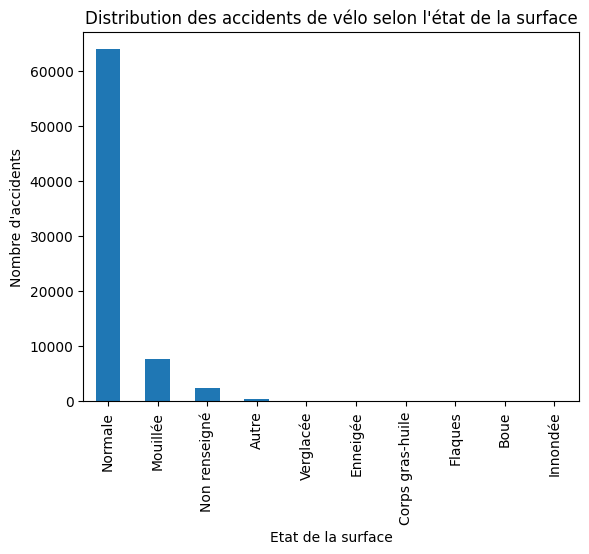

In [16]:
# Remplacement des valeurs une chaîne de caractère (pour le côté esthétique)
df_filtered['surf'] = df_filtered['surf'].replace({-1: 'Non renseigné', 1: 'Normale', 2: 'Mouillée', 3: 'Flaques', 4: 'Innondée', 5:'Enneigée', 6:'Boue', 7:'Verglacée', 8:'Corps gras-huile', 9:'Autre'})

df_filtered['surf'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon l'état de la surface")
plt.xlabel("Etat de la surface")
plt.ylabel("Nombre d'accidents")
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\17815733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['atm'] = df_filtered['atm'].replace({-1: 'Non renseigné', 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige-grêle', 5:'Brouillard-fumée', 6:'Vent fort-tempête', 7:'Temps éblouissant', 8:'Temps couvert', 9:'Autre'})


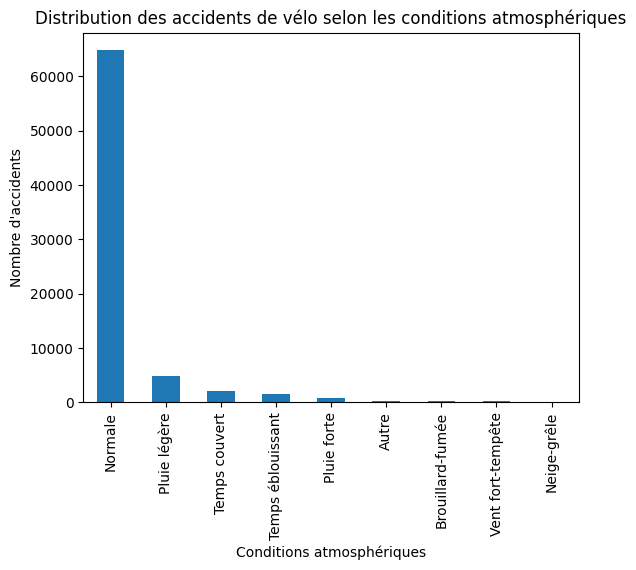

In [17]:
# Remplacement des valeurs une chaîne de caractère (pour le côté esthétique)
df_filtered['atm'] = df_filtered['atm'].replace({-1: 'Non renseigné', 1: 'Normale', 2: 'Pluie légère', 3: 'Pluie forte', 4: 'Neige-grêle', 5:'Brouillard-fumée', 6:'Vent fort-tempête', 7:'Temps éblouissant', 8:'Temps couvert', 9:'Autre'})

df_filtered['atm'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon les conditions atmosphériques")
plt.xlabel("Conditions atmosphériques")
plt.ylabel("Nombre d'accidents")
plt.show()

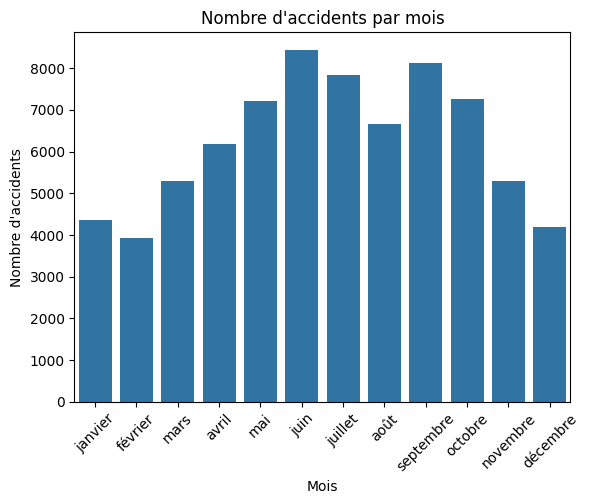

In [18]:
# Créer un histogramme (compte des occurrences des mois)
sns.countplot(x='mois', data=df, order=['janvier', 'février', 'mars', 'avril', 'mai', 'juin', 'juillet', 'août', 'septembre', 'octobre', 'novembre', 'décembre'])

# Ajouter des titres et des étiquettes
plt.title("Nombre d'accidents par mois")
plt.xlabel("Mois")
plt.ylabel("Nombre d'accidents")
plt.xticks(rotation=45) 

# Afficher le graphique
plt.show()

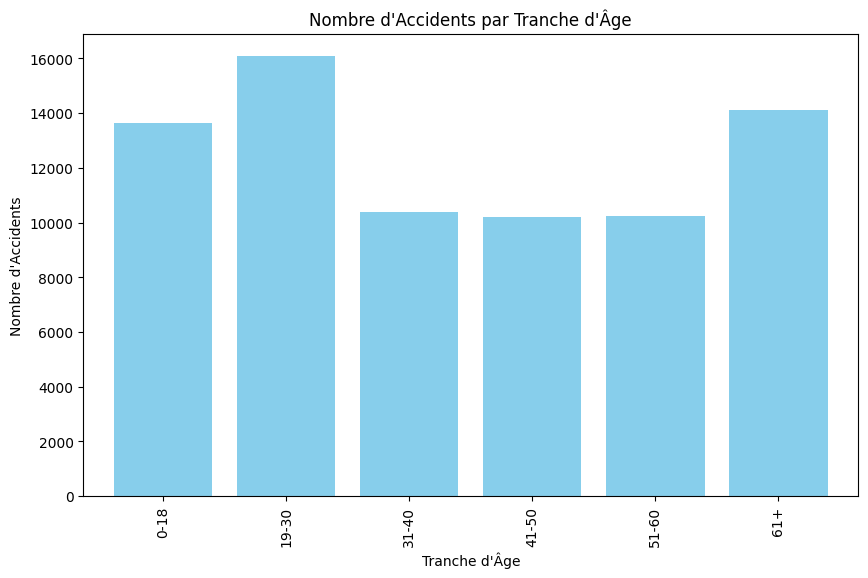

In [19]:
# Définir les tranches d'âge
bins = [0, 18, 30, 40, 50, 60, 100]  # Définir les intervalles d'âge
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61+']  # Labels des tranches

# Créer une colonne "tranche_age" dans le DataFrame
df['tranche_age'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Compter le nombre d'accidents (observations) dans chaque tranche d'âge
accidents_par_age = df['tranche_age'].value_counts().sort_index()

# Créer un histogramme
plt.figure(figsize=(10, 6))  # Taille de la figure
accidents_par_age.plot(kind='bar', color='skyblue', width=0.8)

# Ajouter des titres et des étiquettes
plt.title("Nombre d'Accidents par Tranche d'Âge")
plt.xlabel("Tranche d'Âge")
plt.ylabel("Nombre d'Accidents")

# Afficher le graphique
plt.show()

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_29584\3632930381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['grav'] = df_filtered['grav'].replace({1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'})


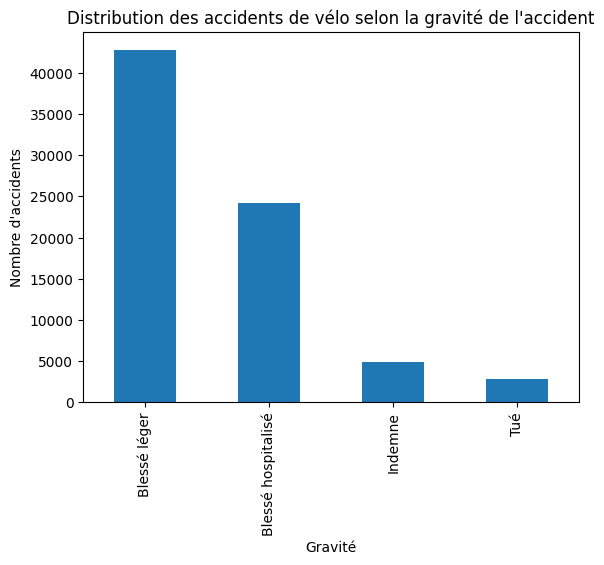

In [20]:
# Remplacement des valeurs une chaîne de caractère (pour le côté esthétique)
df_filtered['grav'] = df_filtered['grav'].replace({1: 'Indemne', 2: 'Tué', 3: 'Blessé hospitalisé', 4: 'Blessé léger'})

df_filtered['grav'].value_counts().plot(kind='bar')
plt.title("Distribution des accidents de vélo selon la gravité de l'accident")
plt.xlabel("Gravité")
plt.ylabel("Nombre d'accidents")
plt.show()

Afficher le nombre d'accidents par département

In [21]:
accidents_par_departement = df['dep'].value_counts()
print(accidents_par_departement)

dep
75     12774
69      2631
33      2449
67      2278
59      2220
       ...  
4         12
9         10
7          7
978        5
8          4
Name: count, Length: 113, dtype: int64


Carte interactive

In [ ]:
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6) 

df_cleaned = df.dropna(subset=['lat', 'long'])

# Ajouter des marqueurs pour chaque département
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Département {row['dep']}"
    ).add_to(m)

# Afficher la carte
m.save("carte_accidents.html")

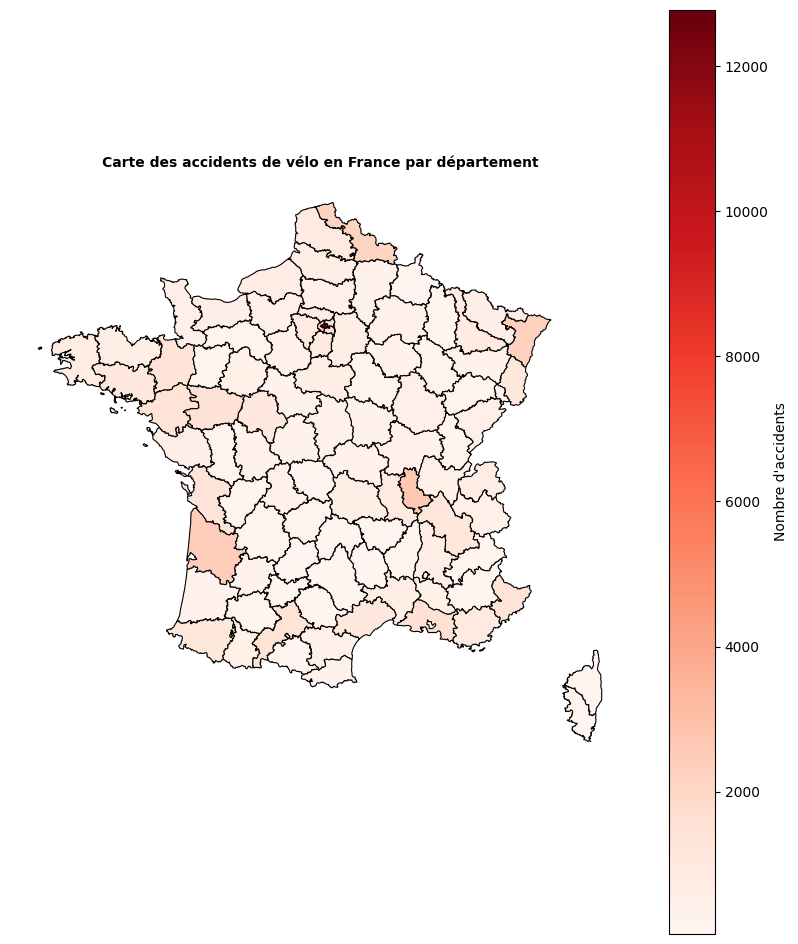

In [134]:
# Charger le fichier GeoJSON des départements français
gdf = gpd.read_file("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\departements.geojson")  # Remplace par le chemin réel si nécessaire

# Compter les accidents par département
accidents_by_dep = df['dep'].value_counts().reset_index()
accidents_by_dep.columns = ['code', 'Nombre_Accidents']
accidents_by_dep['code'] = accidents_by_dep['code'].astype(str)

# Fusionner avec la carte des départements
gdf = gdf.merge(accidents_by_dep, left_on='code', right_on='code', how='left')
gdf['Nombre_Accidents'] = gdf['Nombre_Accidents'].fillna(0)  # Remplace NaN par 0

# Tracer la carte avec un dégradé de couleurs
fig, ax = plt.subplots(1, 1, figsize=(10, 12))
gdf.plot(column='Nombre_Accidents', cmap='Reds', linewidth=0.8, edgecolor='black',
         legend=True, legend_kwds={'label': "Nombre d'accidents", 'orientation': "vertical"}, ax=ax)

ax.set_title("Carte des accidents de vélo en France par département", fontsize=10, fontweight='bold')
ax.axis('off')  # Désactiver les axes

# Afficher la carte
plt.show()

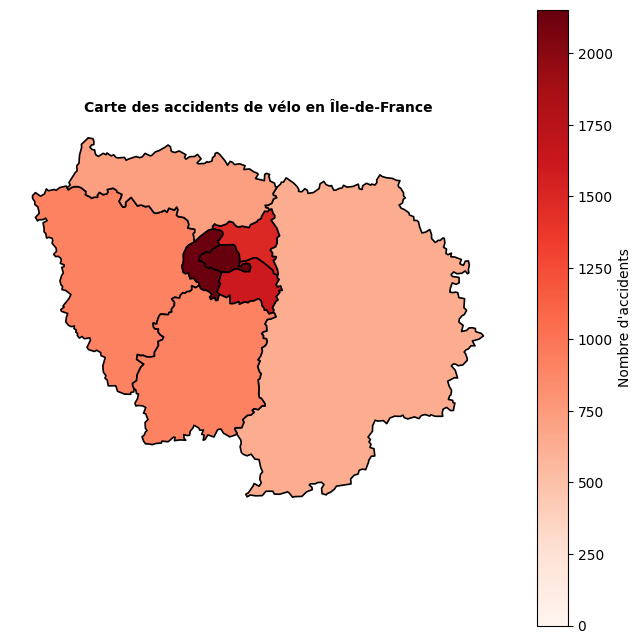

In [135]:
# Liste des codes des départements d'Île-de-France
dep_ile_de_france = ["75", "77", "78", "91", "92", "93", "94", "95"]
gdf_idf = gdf[gdf['code'].isin(dep_ile_de_france)]

# Tracer la carte zoomée sur l'Île-de-France
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf_idf.plot(column='Nombre_Accidents', cmap='Reds', linewidth=1.2, edgecolor='black',
             legend=True, legend_kwds={'label': "Nombre d'accidents", 'orientation': "vertical"}, ax=ax,
             vmin=0, vmax=gdf['Nombre_Accidents'].quantile(0.95))  # Ajustement des couleurs

ax.set_title("Carte des accidents de vélo en Île-de-France", fontsize=10, fontweight='bold')
ax.axis('off')  # Désactiver les axes

# Afficher la carte
plt.show()

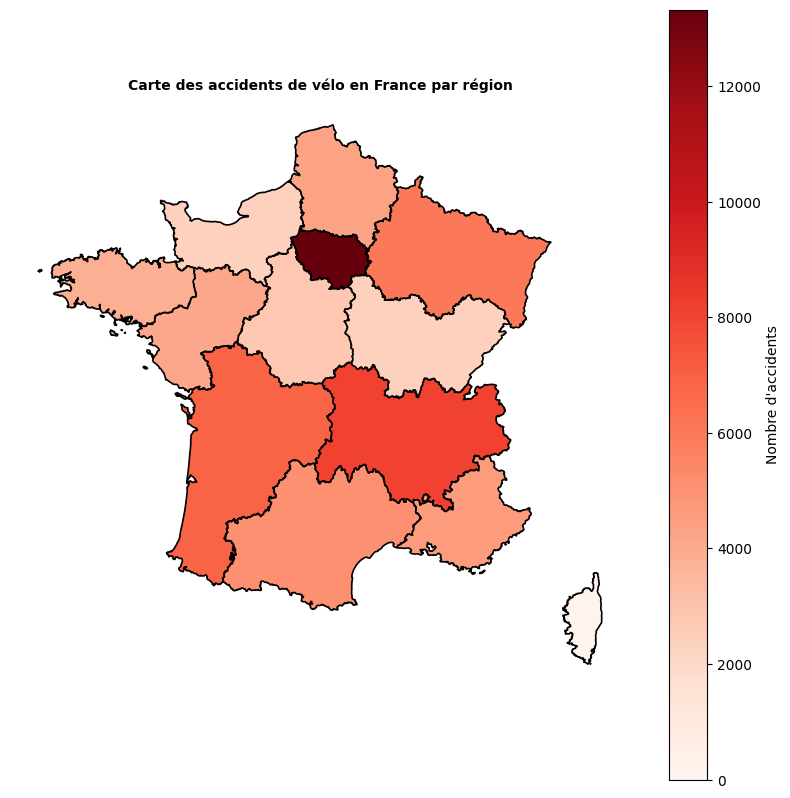

In [ ]:
# Charger le fichier GeoJSON des régions françaises
gdf = gpd.read_file("C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\regions.geojson")  # Remplace par le chemin réel si nécessaire
gdf['code'] = gdf['code'].astype(int)

# Charger les correspondances départements-régions
file_departement_region = "C:\\Users\\Anaïs\\Downloads\\bicycle_accident\\bicycle_accident\\data\\v_departement_2025.csv"  # Fichier associant départements et régions
df_dep_reg = pd.read_csv(file_departement_region)

# Associer chaque accident à sa région
df_accidents = df.merge(df_dep_reg, left_on='dep', right_on='DEP', how='left')

# Compter les accidents par région
accidents_by_region = df_accidents['REG'].value_counts().reset_index()
accidents_by_region.columns = ['code', 'Nombre_Accidents']
accidents_by_region['code'] = accidents_by_region['code'].astype(int)


# Fusionner avec la carte des régions
gdf = gdf.merge(accidents_by_region, left_on='code', right_on='code', how='left')
gdf['Nombre_Accidents'] = gdf['Nombre_Accidents'].fillna(0)  # Remplace NaN par 0

# Exclure les DOM-TOM (codes régions: 01, 02, 03, 04, 06)
dom_codes = [1, 2, 3, 4, 6]
gdf = gdf[~gdf['code'].isin(dom_codes)]

# Tracer la carte avec un dégradé de couleurs
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='Nombre_Accidents', cmap='Reds', linewidth=1.2, edgecolor='black',
         legend=True, legend_kwds={'label': "Nombre d'accidents", 'orientation': "vertical"}, ax=ax,
         vmin=0, vmax=gdf['Nombre_Accidents'].quantile(0.95))  # Ajustement des couleurs

ax.set_title("Carte des accidents de vélo en France par région", fontsize=10, fontweight='bold')
ax.axis('off')  # Désactiver les axes

# Afficher la carte
plt.show()  

# 4. Analyse bivariée

# 5. Analyse multivariée

# 6. Nettoyage

In [ ]:
df_cleaned = df.dropna(subset=['lat', 'long']) 

In [ ]:
df['mois'] = pd.to_datetime(df['mois']) 
   

C:\Users\Anaïs\AppData\Local\Temp\ipykernel_23276\2730637495.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['mois'] = pd.to_datetime(df['mois'])


DateParseError: Unknown datetime string format, unable to parse: janvier, at position 0

# 7. Feature engineering